데이터프레임
- 행(index), 열(column)으로 구성된 2차원 데이터

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({'name' : ['A', 'B', 'C'],
                  'score' : [100, 90, 85] })

In [3]:
df

,name,score
0,A,100
1,B,90
2,C,85


데이터프레임에서 데이터를 추출하거나 조작할 때는 행, 열로 접근해야 함

In [5]:
df['score'] # 시리즈 형태로 추출 (1차원 데이터)

0    100
1     90
2     85
Name: score, dtype: int64

- 열을 기준으로 추출

In [6]:
df[['name', 'score']] # 데이터프레임 형태로 추출 (2차원 데이터)

,name,score
0,A,100
1,B,90
2,C,85


- 연산 가능

In [8]:
df['score'].sum() 

275

In [10]:
df[['name', 'score']].sum()

name     ABC
score    275
dtype: object

예시 (mpg 데이터)

In [11]:
mpg = pd.read_csv("C:/Users/samsung/Downloads/mpg.csv")

In [14]:
mpg.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

- 특정한 열 추출하기

In [15]:
mpg['manufacturer']

0            audi
1            audi
2            audi
3            audi
4            audi
          ...    
229    volkswagen
230    volkswagen
231    volkswagen
232    volkswagen
233    volkswagen
Name: manufacturer, Length: 234, dtype: object

In [16]:
mpg_sp = mpg[['manufacturer', 'model', 'hwy']]

- 데이터 살펴보기

In [28]:
mpg.head() # 앞부분 데이터

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [29]:
mpg.tail() # 뒷부분 데이터

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize
233,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize


In [30]:
mpg.shape # 행과 열의 개수

(234, 11)

- 데이터 타입 확인하기

In [17]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


- 데이터 기술통계량 확인하기

In [31]:
mpg.describe() # 수치형 데이터만 제공
# 평균의 함정에 빠지지 않기 위해 요약통계량을 확인해 데이터의 개괄적인 분포 파악
# 데이터의 분포를 파악하는 것은, 이후 머신러닝 딥러닝 등 모델링 단계에서 정규분포를 가정하기 떄문
# 분산과 표준편차는 평균을 기준으로, 사분위수는 중앙값을 기준으로 함

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


<AxesSubplot:>

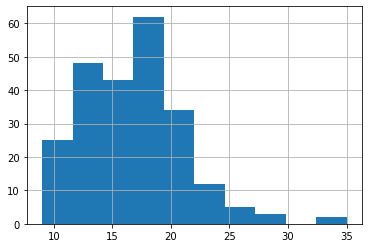

In [32]:
mpg['cty'].hist()

<AxesSubplot:>

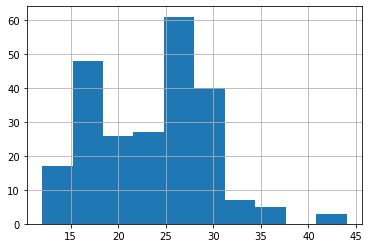

In [33]:
mpg['hwy'].hist()

In [34]:
# cty, hwy의 합을 구하고 싶은 경우 파생변수 생성
mpg['tot'] = mpg['cty'] + mpg['hwy'] 

In [36]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,tot
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,51
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,42


In [37]:
import numpy as np

In [38]:
# 특정한 조건을 설정하고, 이를 충족하는 경우와 그렇지 않은 경우를 구분하고 싶은 경우
mpg['test'] = np.where(mpg['tot'] > 40, 'good', 'bad')

In [39]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,tot,test
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47,good
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50,good
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51,good
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,51,good
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,42,good


In [41]:
mpg['test'].value_counts()

good    123
bad     111
Name: test, dtype: int64

- 문자열 데이터(object) 처리
    1. 빈도
    2. 라벨링 (인코딩)

In [19]:
# 제조사 별 자동차 수 확인
mpg['manufacturer'].value_counts() # 값의 개수 확인

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: manufacturer, dtype: int64

In [20]:
mpg_mc = mpg['manufacturer'].value_counts()

In [25]:
mpg_mc = mpg_mc.to_frame() # 시리즈를 데이터 프레임으로

In [26]:
mpg_mc

,manufacturer
dodge,37
toyota,34
volkswagen,27
ford,25
chevrolet,19
audi,18
hyundai,14
subaru,14
nissan,13
honda,9
